In [1]:
# %%
import os,sys,inspect
currentdir = "D:\BAMT\plan\\big_cluster"
parentdir = os.path.dirname(currentdir)
parentparentdir = os.path.dirname(parentdir)
sys.path.insert(0,parentparentdir)

# %%
import pandas as pd
import random
import numpy as np
from bayesian.save_bn import save_structure, save_params, read_structure, read_params

from copy import copy


import matplotlib.pyplot as plt
from core.core_utils import project_root


from sklearn.metrics import accuracy_score, mean_squared_error

from graph.precision_recall import child_dict, precision_recall
import json5

In [2]:
name_dict = {'healthcare': 4500, 'sangiovese': 4500, 'mehra': 4500, 'hepar2': 3000, 'diabetes': 3000, 'link': 3000, 'pathfinder': 3000}

In [3]:
option = 'MI'

C:\Users\AB\AppData\Local\Temp\ipykernel_12024\398960561.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\398960561.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\398960561.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\398960561.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\398960561.py:16: User

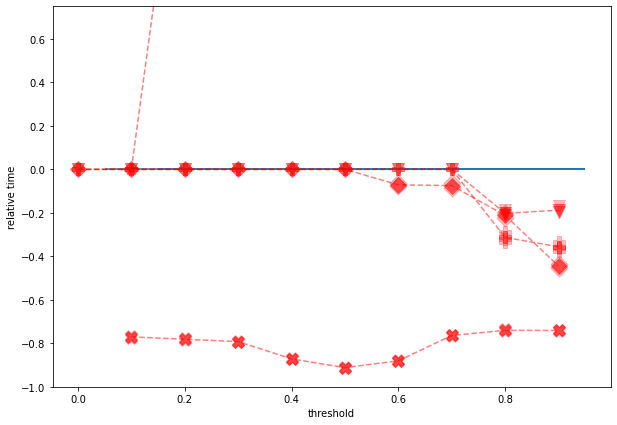

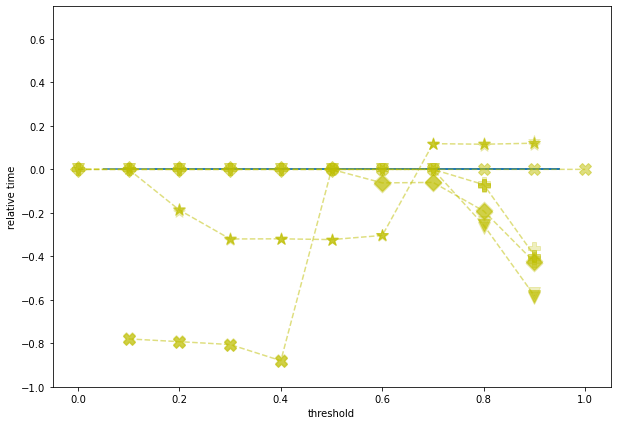

In [4]:

color_list = ['r', 'y', 'g']
marker_list = ['*', 'v', 'P', 'D', 'X', 'o']
# marker_list = ['^', '<', '>']
    
    
for i, code_type in enumerate(['hamming', 'mostly']):
    fig = plt.figure(figsize =(10, 7))
    plt.ylim((-1.0, 0.75))
    for j, name in enumerate(['healthcare', 'sangiovese', 'mehra', 'hepar2', 'pathfinder']):
        result = pd.read_csv(f'{name}_{option}_stat.csv')
        result = result.sort_values('alpha')
        time = []
        shd = []
        for k in range(len(result)):
            row = result.iloc[k]
            ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
            time.append(row['time']/ideal['time'] - 1.0)
            shd.append(row['SHD']/ideal['SHD'] - 1.0)
        result_new = copy(result)
        result_new['new_time'] = time
        result_new["new_shd"] = shd

        df_loc = result_new[result_new['code_type'] == code_type]
        group = df_loc[df_loc['alpha'] > 0.0].groupby(by='alpha')[['new_time', 'new_shd']].mean()
        plt.scatter(df_loc['alpha'], df_loc['new_time'], c=color_list[i], marker=marker_list[j], label=f'{name} {code_type}', alpha = 0.25, s=12**2)
        alphas = list(group.index.values)
        target = list(group['new_time'].values)
        if len(alphas) == 0:
            alphas = [k*0.1 for k in range(1, 10)]
            target = [0.0 for k in range(1, 10)]
        while alphas[0] > 0.1+1e-20:
            alphas = [alphas[0] -0.1] + alphas
            target = [0.0] + target
        while alphas[-1] < 0.9:
            alphas.append(alphas[-1] +0.1)
            target.append(0.0)
        plt.plot(alphas, target, '--', c=color_list[i], marker=marker_list[j],alpha = 0.5, markersize=12)
        plt.hlines(xmin=min(result_new[result_new['alpha'] > 0.0]['alpha']) - 0.05, xmax=max(result_new[result_new['alpha'] > 0.0]['alpha'])+ 0.05, y=[0.0])
        #plt.legend()
        plt.xlabel('threshold')
        plt.ylabel('relative time')

C:\Users\AB\AppData\Local\Temp\ipykernel_12024\2820720125.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\2820720125.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\2820720125.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\2820720125.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\2820720125.py:14:

<Figure size 720x504 with 0 Axes>

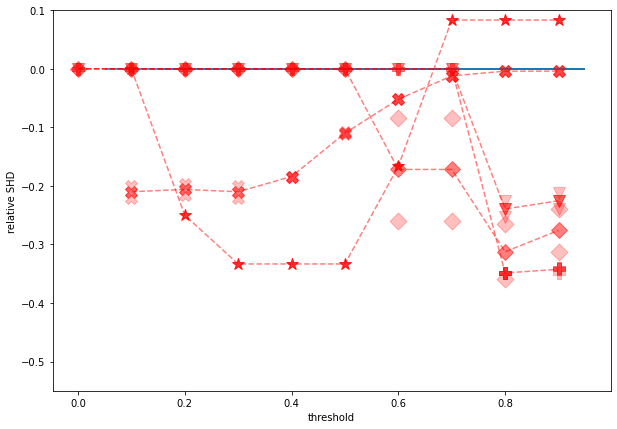

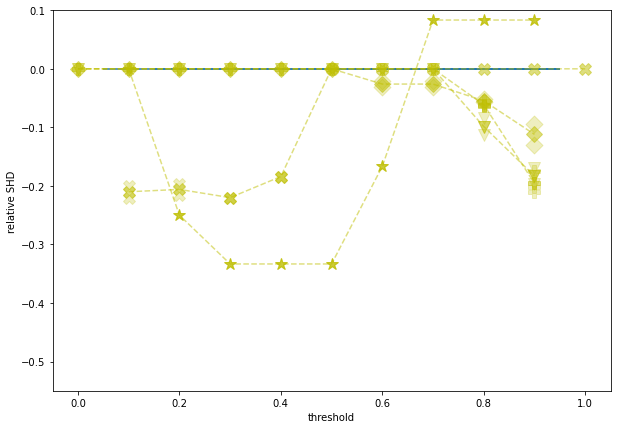

In [5]:
fig = plt.figure(figsize =(10, 7))
color_list = ['r', 'y', 'g']
# marker_list = ['^', '<', '>']
for i, code_type in enumerate(['hamming', 'mostly']):
    fig = plt.figure(figsize =(10, 7))
    plt.ylim((-0.55, 0.1))
    for j, name in enumerate(['healthcare', 'sangiovese', 'mehra', 'hepar2', 'pathfinder']):
        result = pd.read_csv(f'{name}_{option}_stat.csv')
        result = result.sort_values('alpha')
        time = []
        shd = []
        for k in range(len(result)):
            row = result.iloc[k]
            ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
            time.append(row['time']/ideal['time'] - 1.0)
            shd.append(row['SHD']/ideal['SHD'] - 1.0)
        result_new = copy(result)
        result_new['new_time'] = time
        result_new["new_shd"] = shd

        df_loc = result_new[result_new['code_type'] == code_type]
        group = df_loc[df_loc['alpha'] > 0.0].groupby(by='alpha')[['new_time', 'new_shd']].mean()
        plt.scatter(df_loc['alpha'], df_loc['new_shd'], c=color_list[i], marker=marker_list[j], label=f'{name} {code_type}', alpha = 0.25, s=12**2)
        alphas = list(group.index.values)
        target = list(group['new_shd'].values)
        if len(alphas) == 0:
            alphas = [k/10 for k in range(1, 10)]
            target = [0.0 for k in range(1, 10)]
        while alphas[0] > 0.1:
            alphas = [alphas[0] -0.1] + alphas
            target = [0.0] + target
        while alphas[-1] < 0.9:
            alphas.append(alphas[-1] +0.1)
            target.append(0.0)
        plt.plot(alphas, target, '--', c=color_list[i], marker=marker_list[j],alpha = 0.5, markersize=12)
        plt.hlines(xmin=min(result_new[result_new['alpha'] > 0.0]['alpha']) - 0.05, xmax=max(result_new[result_new['alpha'] > 0.0]['alpha'])+ 0.05, y=[0.0])
        #plt.legend()
        plt.xlabel('threshold')
        plt.ylabel('relative SHD')

In [6]:
nodes_rage = [15, 24, 70, 109]

In [7]:
recom_alpha = pd.read_csv('com_alpha.csv')

C:\Users\AB\AppData\Local\Temp\ipykernel_12024\3874613166.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\3874613166.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\3874613166.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\3874613166.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\3874613166.py:16:

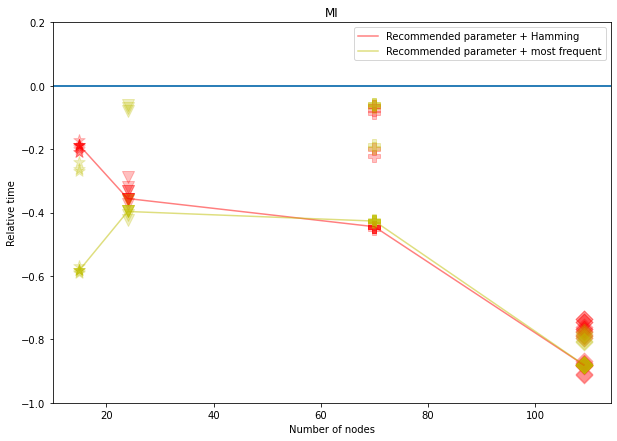

In [12]:
color_list = ['r', 'y', 'g']
fig = plt.figure(figsize =(10, 7))
for i, code_type in enumerate(['hamming', 'mostly']):
    means = []
    recom = []
    
    plt.ylim((-1.0, 0.2))
    plt.xlim((10, 114))
    for j, name in enumerate(['sangiovese', 'mehra', 'hepar2', 'pathfinder']):
        result = pd.read_csv(f'{name}_{option}_stat.csv')
        result = result.sort_values('alpha')
        time = []
        shd = []
        for k in range(len(result)):
            row = result.iloc[k]
            ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
            time.append(row['time']/ideal['time'] - 1.0)
            shd.append(row['SHD']/ideal['SHD'] - 1.0)
        result_new = copy(result)
        result_new['new_time'] = time
        result_new["new_shd"] = shd

        df_loc = result_new[result_new['code_type'] == code_type]
        if len(df_loc) > 0:
            means.append(df_loc['new_time'].mean())
            
            alpha_list = json5.loads(recom_alpha[recom_alpha['name'] == name]['alpha'].iloc[0].replace('\'', '\"'))
    
            max_list = json5.loads(recom_alpha[recom_alpha['name'] == name]['max'].iloc[0].replace('\'', '\"'))
            for k in range(len(alpha_list)):
                if df_loc["alpha"].isin([float(alpha_list[k])]).any():
                    alpha = float(alpha_list[k])
                    max_value = max_list[k]
                    break
            
            recom.append(df_loc[df_loc['alpha'] == alpha]['new_time'].mean())
        
        else:
            # pass
            means.append(0.0)
            recom.append(0.0)
        
        plt.scatter([nodes_rage[j] for _ in range(len(df_loc['new_time']))], df_loc['new_time'], c=color_list[i], marker=marker_list[j], alpha = 0.25, s=12**2)
        
    plt.hlines(xmin=6, xmax=114, y=[0.0])
    for p, nodes in enumerate(nodes_rage):
        # plt.scatter(nodes, means[p], c=color_list[i], marker=marker_list[p], alpha = 0.75, s=12**2)
        plt.scatter(nodes, recom[p], c=color_list[i], marker=marker_list[p], alpha = 0.75, s=12**2)
    # plt.plot(nodes_rage, means, '--', c=color_list[i], alpha = 0.5, label = code_type)
    
    if code_type == 'mostly':
        plt.plot(nodes_rage, recom, '-', c=color_list[i], alpha = 0.5, label = 'Recommended parameter + ' + 'most frequent')
    elif code_type == 'hamming':
        plt.plot(nodes_rage, recom, '-', c=color_list[i], alpha = 0.5, label = 'Recommended parameter + ' + 'Hamming')
    plt.legend()
    plt.xlabel('Number of nodes')
    plt.ylabel('Relative time')
    plt.title(option)
    plt.savefig(f"recomm_time_{option}.pdf")


C:\Users\AB\AppData\Local\Temp\ipykernel_12024\2365297839.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\2365297839.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\2365297839.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\2365297839.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\2365297839.py:15:

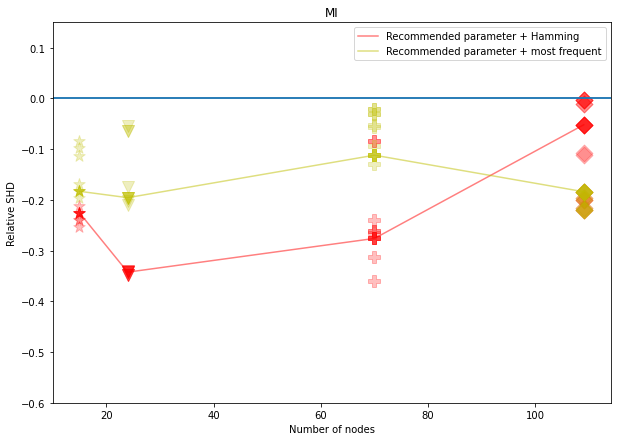

In [15]:
fig = plt.figure(figsize =(10, 7))
for i, code_type in enumerate(['hamming', 'mostly']):
    means = []
    recom = []
    
    plt.ylim((-0.6, 0.15))
    plt.xlim((10, 114))
    for j, name in enumerate(['sangiovese', 'mehra', 'hepar2', 'pathfinder']):
        result = pd.read_csv(f'{name}_{option}_stat.csv')
        result = result.sort_values('alpha')
        time = []
        shd = []
        for k in range(len(result)):
            row = result.iloc[k]
            ideal = result[result['code_type'] == 'none'][result['samples'] == row['samples']].iloc[0]
            time.append(row['time']/ideal['time'] - 1.0)
            shd.append(row['SHD']/ideal['SHD'] - 1.0)
        result_new = copy(result)
        result_new['new_time'] = time
        result_new["new_shd"] = shd

        df_loc = result_new[result_new['code_type'] == code_type]
        if len(df_loc) > 0:
            means.append(df_loc['new_shd'].mean())
            
            alpha_list = json5.loads(recom_alpha[recom_alpha['name'] == name]['alpha'].iloc[0].replace('\'', '\"'))
    
            max_list = json5.loads(recom_alpha[recom_alpha['name'] == name]['max'].iloc[0].replace('\'', '\"'))
            for k in range(len(alpha_list)):
                if df_loc["alpha"].isin([float(alpha_list[k])]).any():
                    alpha = float(alpha_list[k])
                    max_value = max_list[k]
                    break
            
            recom.append(df_loc[df_loc['alpha'] == alpha]['new_shd'].mean())
        else:
            # pass
            means.append(0.0)
            recom.append(0.0)
        

        plt.scatter([nodes_rage[j] for _ in range(len(df_loc['new_shd']))], df_loc['new_shd'], c=color_list[i], marker=marker_list[j], alpha = 0.25, s=12**2)
        
    plt.hlines(xmin=6, xmax=114, y=[0.0])
    for p, nodes in enumerate(nodes_rage):
        # plt.scatter(nodes, means[p], c=color_list[i], marker=marker_list[p], alpha = 0.75, s=12**2)
        plt.scatter(nodes, recom[p], c=color_list[i], marker=marker_list[p], alpha = 0.75, s=12**2)
    # plt.plot(nodes_rage, means, '--', c=color_list[i], alpha = 0.5, label = code_type)
    if code_type == 'mostly':
        plt.plot(nodes_rage, recom, '-', c=color_list[i], alpha = 0.5, label = 'Recommended parameter + ' + 'most frequent')
    elif code_type == 'hamming':
        plt.plot(nodes_rage, recom, '-', c=color_list[i], alpha = 0.5, label = 'Recommended parameter + ' + 'Hamming')
    plt.legend()
    plt.xlabel('Number of nodes')
    plt.ylabel('Relative SHD')
    plt.title(option)
    plt.savefig(f"recomm_shd_{option}.pdf")

C:\Users\AB\AppData\Local\Temp\ipykernel_12024\861291878.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result_extra[result_extra['code_type'] == 'none'][result_extra['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\861291878.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result_extra[result_extra['code_type'] == 'none'][result_extra['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\861291878.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result_extra[result_extra['code_type'] == 'none'][result_extra['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_12024\861291878.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result_extra[result_extra['code_type'] == 'none'][result_extra['samples'] == row['samples']].iloc

IndexError: list index out of range

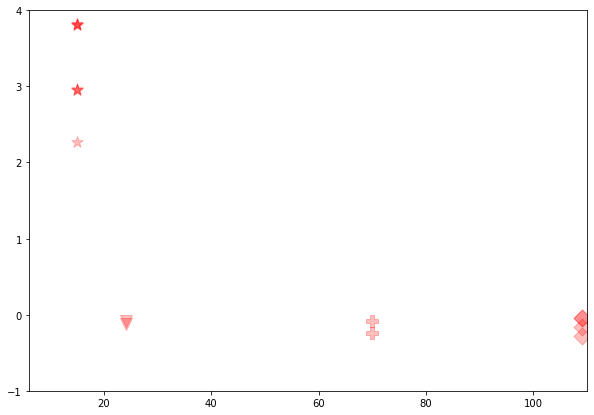

In [10]:
color_list = ['r', 'y', 'g']
fig = plt.figure(figsize =(10, 7))
for i, code_type in enumerate(['hamming', 'mostly']):
    means = []
    recom = []
    
    plt.ylim((-1.0, 4.0))
    plt.xlim((6, 110))
    for j, name in enumerate(['healthcare', 'sangiovese', 'mehra', 'hepar2', 'pathfinder']):
        result = pd.read_csv(f'{name}_{option}_stat.csv')
        result = result.sort_values('alpha')
        result_extra = pd.read_csv(f'{name}_{option}_extra_stat.csv')
        result_extra = result_extra.sort_values('alpha')
        time = []
        shd = []
        for k in range(len(result_extra)):
            row = result_extra.iloc[k]
            ideal = result_extra[result_extra['code_type'] == 'none'][result_extra['samples'] == row['samples']].iloc[0]
            filter_v = {key: row[key] for key in ['alpha', 'code_type', 'samples']}
            row_pre = result.loc[(result[list(filter_v)] == pd.Series(filter_v)).all(axis=1)].iloc[0]
      
            time.append((row['time'] + row_pre['time'])/ideal['time'] - 1.0)
            shd.append(row['SHD']/ideal['SHD'] - 1.0)
        result_new = copy(result_extra)
        result_new['new_time'] = time
        result_new["new_shd"] = shd

        df_loc = result_new[result_new['code_type'] == code_type][result_new['samples'] == name_dict[name]]
        if len(df_loc) > 0:
            means.append(df_loc['new_time'].mean())
            
            alpha_list = json5.loads(recom_alpha[recom_alpha['name'] == name]['alpha'].iloc[0].replace('\'', '\"'))
    
            max_list = json5.loads(recom_alpha[recom_alpha['name'] == name]['max'].iloc[0].replace('\'', '\"'))
            for k in range(len(alpha_list)):
                if df_loc["alpha"].isin([float(alpha_list[k])]).any():
                    alpha = float(alpha_list[k])
                    max_value = max_list[k]
                    break
            
            recom.append(df_loc[df_loc['alpha'] == alpha]['new_time'].mean())
        
        else:
            # pass
            means.append(0.0)
            recom.append(0.0)
        
        plt.scatter([nodes_rage[j] for _ in range(len(df_loc['new_time']))], df_loc['new_time'], c=color_list[i], marker=marker_list[j], alpha = 0.25, s=12**2)
        
    plt.hlines(xmin=6, xmax=110, y=[0.0])
    for p, nodes in enumerate(nodes_rage):
        # plt.scatter(nodes, means[p], c=color_list[i], marker=marker_list[p], alpha = 0.75, s=12**2)
        plt.scatter(nodes, recom[p], c=color_list[i], marker=marker_list[p], alpha = 0.75, s=12**2)
    # plt.plot(nodes_rage, means, '--', c=color_list[i], alpha = 0.5, label = code_type)
    
    if code_type == 'mostly':
        plt.plot(nodes_rage, recom, '-', c=color_list[i], alpha = 0.5, label = 'Recommended parameter + ' + 'most frequent')
    elif code_type == 'hamming':
        plt.plot(nodes_rage, recom, '-', c=color_list[i], alpha = 0.5, label = 'Recommended parameter + ' + 'Hamming')
    plt.legend()
    plt.xlabel('Number of nodes')
    plt.ylabel('Relative time')
    plt.title(option)
    plt.savefig(f"recomm_time_{option}_extra.pdf")


C:\Users\AB\AppData\Local\Temp\ipykernel_8296\3745067810.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result_extra[result_extra['code_type'] == 'none'][result_extra['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_8296\3745067810.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result_extra[result_extra['code_type'] == 'none'][result_extra['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_8296\3745067810.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result_extra[result_extra['code_type'] == 'none'][result_extra['samples'] == row['samples']].iloc[0]
C:\Users\AB\AppData\Local\Temp\ipykernel_8296\3745067810.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ideal = result_extra[result_extra['code_type'] == 'none'][result_extra['samples'] == row['samples']].iloc

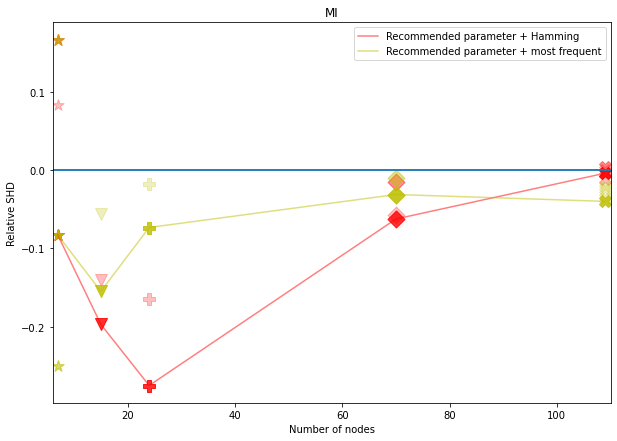

In [ ]:
color_list = ['r', 'y', 'g']
fig = plt.figure(figsize =(10, 7))
for i, code_type in enumerate(['hamming', 'mostly']):
    means = []
    recom = []
    
    # plt.ylim((-1.0, 4.0))
    plt.xlim((6, 110))
    for j, name in enumerate(['healthcare', 'sangiovese', 'mehra', 'hepar2', 'pathfinder']):
        result = pd.read_csv(f'{name}_{option}_stat.csv')
        result = result.sort_values('alpha')
        result_extra = pd.read_csv(f'{name}_{option}_extra_stat.csv')
        result_extra = result_extra.sort_values('alpha')
        time = []
        shd = []
        for k in range(len(result_extra)):
            row = result_extra.iloc[k]
            ideal = result_extra[result_extra['code_type'] == 'none'][result_extra['samples'] == row['samples']].iloc[0]
            filter_v = {key: row[key] for key in ['alpha', 'code_type', 'samples']}
            row_pre = result.loc[(result[list(filter_v)] == pd.Series(filter_v)).all(axis=1)].iloc[0]
      
            time.append((row['time'] + row_pre['time'])/ideal['time'] - 1.0)
            shd.append(row['SHD']/ideal['SHD'] - 1.0)
        result_new = copy(result_extra)
        result_new['new_time'] = time
        result_new["new_shd"] = shd

        df_loc = result_new[result_new['code_type'] == code_type][result_new['samples'] == name_dict[name]]
        if len(df_loc) > 0:
            means.append(df_loc['new_shd'].mean())
            
            alpha_list = json5.loads(recom_alpha[recom_alpha['name'] == name]['alpha'].iloc[0].replace('\'', '\"'))
    
            max_list = json5.loads(recom_alpha[recom_alpha['name'] == name]['max'].iloc[0].replace('\'', '\"'))
            for k in range(len(alpha_list)):
                if df_loc["alpha"].isin([float(alpha_list[k])]).any():
                    alpha = float(alpha_list[k])
                    max_value = max_list[k]
                    break
            
            recom.append(df_loc[df_loc['alpha'] == alpha]['new_shd'].mean())
        
        else:
            # pass
            means.append(0.0)
            recom.append(0.0)
        
        plt.scatter([nodes_rage[j] for _ in range(len(df_loc['new_shd']))], df_loc['new_shd'], c=color_list[i], marker=marker_list[j], alpha = 0.25, s=12**2)
        
    plt.hlines(xmin=6, xmax=110, y=[0.0])
    for p, nodes in enumerate(nodes_rage):
        # plt.scatter(nodes, means[p], c=color_list[i], marker=marker_list[p], alpha = 0.75, s=12**2)
        plt.scatter(nodes, recom[p], c=color_list[i], marker=marker_list[p], alpha = 0.75, s=12**2)
    # plt.plot(nodes_rage, means, '--', c=color_list[i], alpha = 0.5, label = code_type)
    
    if code_type == 'mostly':
        plt.plot(nodes_rage, recom, '-', c=color_list[i], alpha = 0.5, label = 'Recommended parameter + ' + 'most frequent')
    elif code_type == 'hamming':
        plt.plot(nodes_rage, recom, '-', c=color_list[i], alpha = 0.5, label = 'Recommended parameter + ' + 'Hamming')
    plt.legend()
    plt.xlabel('Number of nodes')
    plt.ylabel('Relative SHD')
    plt.title(option)
    plt.savefig(f"recomm_shd_{option}_extra.pdf")
